# Calibration

## 1. Prerequisites

### 1.1 Chessboard object

See Chessboard notebook to create one chessboard object if he don't exist or load existing file with :

In [1]:
from openalea.phenomenal.data_access.plant_1 import plant_1_chessboards

# Load chessboard object
chess_1, chess_2 = plant_1_chessboards()

## 2. Calibrate

### 2.1 Do calibration

In [2]:
from openalea.phenomenal.calibration import (
    CalibrationCameraSideWith2TargetYXZ)

# Define size image of image chessboard to calibrate
size_image = (2056, 2454)

# Calibrate
id_camera = "side"
calibration = CalibrationCameraSideWith2TargetYXZ()
err = calibration.calibrate(chess_1.get_corners_2d(id_camera), 
                            chess_1.get_corners_local_3d(),
                            chess_2.get_corners_2d(id_camera), 
                            chess_2.get_corners_local_3d(),
                            size_image,
                            number_of_repetition=5)

print err

7.68843335473


### 2.2 Dump & load

In [3]:
# Dump
calibration.dump('calibration_camera_side')

In [4]:
from openalea.phenomenal.calibration.calibration import CalibrationCameraSideWith2Target

# Load 
calibration = CalibrationCameraSideWith2Target.load('calibration_camera_side')

### 2.6 Viewing calibration result

#### 2.6.1 Download dataset examples

Download the chessboard image dataset [here](https://gforge.inria.fr/frs/download.php/file/35019/CHESSBOARD_PhenoArch_2013_sv_face1.zip) and extract it. Indicate the path in **data_path_directory** variable below. 

In [5]:
data_path_directory = './CHESSBOARD_PhenoArch_2013_sv_face1/'

#### 2.6.1 Load path file from chessboard image dataset

In [6]:
import glob

# Load path files from directory
files_path = glob.glob(data_path_directory + '*.png')

# Extract angles from path files
angles = map(lambda x: int((x.split('_sv')[-1]).split('.png')[0]), files_path)

images_path = dict()
for i in range(len(files_path)):
    images_path[angles[i]] = files_path[i]

#### 2.6.2 Show chessboard image with corners projection

<IPython.core.display.Javascript object>


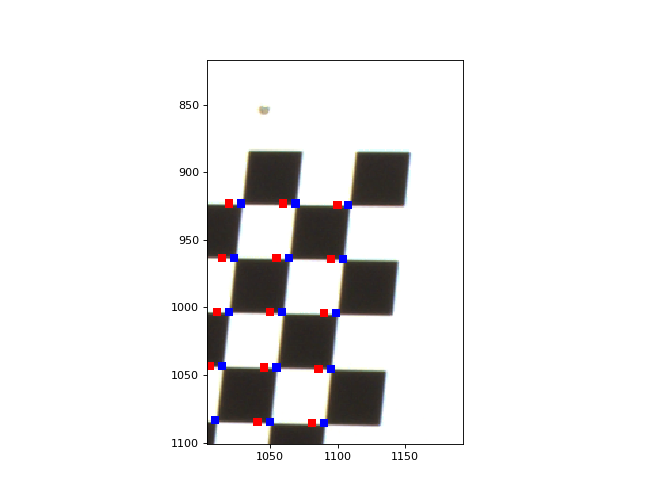

In [17]:
%matplotlib notebook

import matplotlib.pyplot
from openalea.phenomenal.image import read_image
from openalea.phenomenal.display import show_image

import cv2
# from alinea.phenomenal.display.image import 

angle = 69

img = read_image(images_path[angle])
k = 3

# RED POINTS ARE POINTS POSITIONS DETECTED BY OPENCV CHESSBOARD DETECTION 
pt_2d = chess_1.image_points["side"][angle].astype(int)

for x, y in zip(pt_2d[:, 0, 1], pt_2d[:, 0, 0]):
     img[x-k:x+k, y-k:y+k] = [255, 0, 0]

calibration = CalibrationCameraSideWith2Target.load('calibration_camera_side')
calibration._cam_pos_x = calibration._cam_pos_x - 10
calibration._cam_pos_y = calibration._cam_pos_y
calibration._cam_rot_y = calibration._cam_rot_y

# BLUE POINTS ARE POINTS POSITIONS PROJECTED BY CALIBRATION CHESSBOARD COMPUTATION
points_2d = calibration.get_target_1_projected(angle, chess_1.get_corners_local_3d())


for x, y in points_2d:
    x = int(x)
    y = int(y)
    
    img[y-k:y+k, x-k:x+k] = [0, 0, 255]

show_image(img)